# Import Statements

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from collections import Counter

In [53]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [54]:
data = pd.read_csv("mcdonalds.csv")

In [55]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


# Data Description

In [56]:
# The data collection includes responses from 1453 adult Australian consumers about how they see the following aspects of McDonald's: 
# YUMMY,
# CONVENIENT,
# SPICY,
# FATTENING,
# GREASY,
# FAST,
# CHEAP,
# TASTY,
# EXPENSIVE,
# HEALTHY,
# DISGUSTING.

# Data Checking

In [57]:
data.shape

(1453, 15)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [59]:
data.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [60]:
data.isna().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [61]:
# Checking the count of 'Gender', 'VisitFrequency' and 'Like'
data['Gender'].value_counts()
data['VisitFrequency'].value_counts()
data['Like'].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

Dataset is verified and checked successfully!

# Exploratory Data Analysis (EDA)

### Customer Segmentation on the basis of **Gender**

In [62]:
data['Gender'].value_counts()

Female    788
Male      665
Name: Gender, dtype: int64

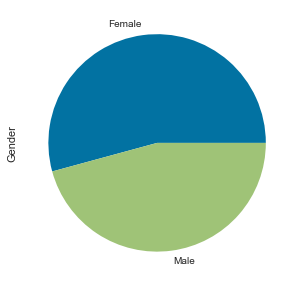

In [63]:
plot = data['Gender'].value_counts().plot(kind='pie', figsize=(5, 5))

 Conclusion: There are more female customers than male.

### Customer Segmentation on the basis of **Age**

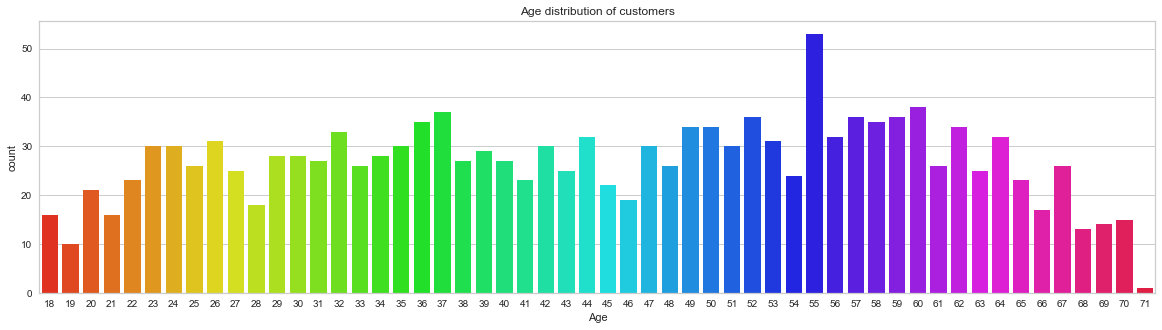

In [64]:
plt.rcParams['figure.figsize'] = (20, 5)
f = sns.countplot(x=data['Age'],palette = 'hsv')
plt.title('Age distribution of customers')
plt.show()

Conclusion: McDonalds have more customers of age between 50-60 and 32-37

# Data Preprocessing

### Label Encoding | Categorical Variable

'yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting'

In [65]:
data_mod = data.copy()

In [66]:
cat_features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

In [67]:
for i in cat_features:
  print(i)
  print("Unique Values:", data_mod[i].unique())
  print()

yummy
Unique Values: ['No' 'Yes']

convenient
Unique Values: ['Yes' 'No']

spicy
Unique Values: ['No' 'Yes']

fattening
Unique Values: ['Yes' 'No']

greasy
Unique Values: ['No' 'Yes']

fast
Unique Values: ['Yes' 'No']

cheap
Unique Values: ['Yes' 'No']

tasty
Unique Values: ['No' 'Yes']

expensive
Unique Values: ['Yes' 'No']

healthy
Unique Values: ['No' 'Yes']

disgusting
Unique Values: ['No' 'Yes']



In [68]:
for i in cat_features:
  data_mod[i] = LabelEncoder().fit_transform(data_mod[i])

Replacing 'i love it!+5' and 'i hate it!-5' part from the "Like" and encoding it in numerical format ("+2" => 2)

In [69]:
data_mod['Like'].unique()

array(['-3', '+2', '+1', '+4', 'I love it!+5', 'I hate it!-5', '-2', '+3',
       '0', '-4', '-1'], dtype=object)

In [70]:
data_mod['Like']

0                 -3
1                 +2
2                 +1
3                 +4
4                 +2
            ...     
1448    I hate it!-5
1449              +2
1450              +3
1451              +4
1452              -3
Name: Like, Length: 1453, dtype: object

In [71]:
data_mod['Like'].replace(["I love it!+5"],"5",inplace=True)
data_mod['Like'].replace(["I hate it!-5"],"-5",inplace=True)

In [72]:
data_mod['Like'] = data_mod['Like'].astype(int)

In [73]:
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   int32 
 1   convenient      1453 non-null   int32 
 2   spicy           1453 non-null   int32 
 3   fattening       1453 non-null   int32 
 4   greasy          1453 non-null   int32 
 5   fast            1453 non-null   int32 
 6   cheap           1453 non-null   int32 
 7   tasty           1453 non-null   int32 
 8   expensive       1453 non-null   int32 
 9   healthy         1453 non-null   int32 
 10  disgusting      1453 non-null   int32 
 11  Like            1453 non-null   int32 
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int32(12), int64(1), object(2)
memory usage: 102.3+ KB


# Data Visualization

### Histogram plot of Binary Variables & ("Like", "Age")

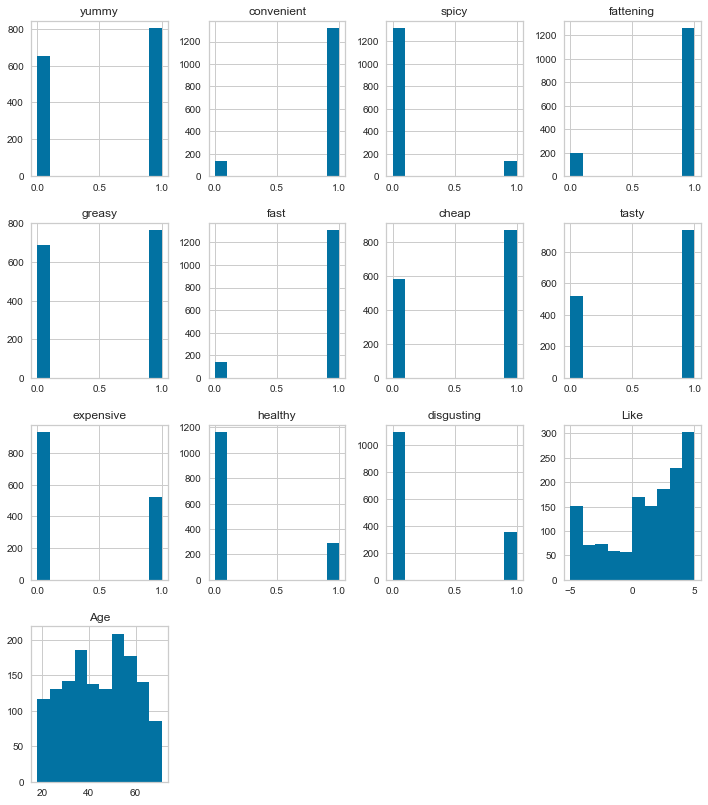

In [74]:
plt.rcParams['figure.figsize'] = (12,14)
data_mod.hist()
plt.show()

### Distribution of "Like"

<AxesSubplot:xlabel='Like', ylabel='count'>

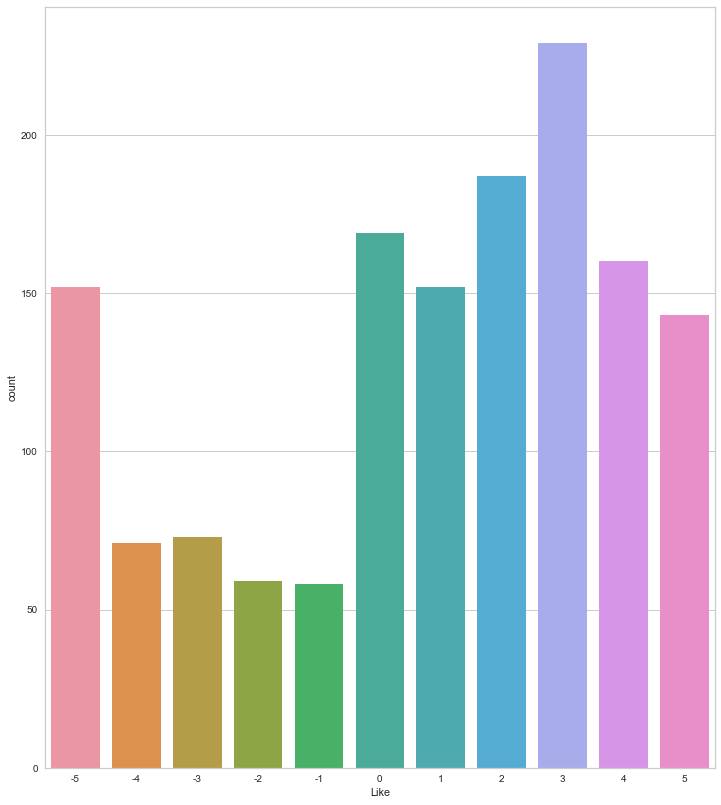

In [75]:
sns.countplot(x='Like',data=data_mod)

Conclusion: Most of the customers have given a rating of 3 (Average Rating)

# Principal Componenent Analysis (PCA)

Taking the first 11 features from the dataset and applying PCA over them \
Number of Principal Components Taken: 5

In [76]:
data_mod_forPCA = data_mod.loc[:,cat_features]

In [77]:
pca = PCA(n_components=5)
pc = pca.fit_transform(data_mod_forPCA)
names = ['pc1','pc2','pc3','pc4','pc5']
pf = pd.DataFrame(data = pc, columns = names)
pf

,pc1,pc2,pc3,pc4,pc5
0,0.425367,-0.219079,0.663255,-0.401300,0.201705
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669
2,0.375415,0.730435,-0.122040,0.692262,0.839643
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415
4,0.187057,-0.807610,0.028537,0.548332,0.854074
...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645


Proportion of Variance from First to Fifth PC

In [78]:
pca.explained_variance_ratio_

array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052])

Text(0.5, 1.0, 'Scree Plot')

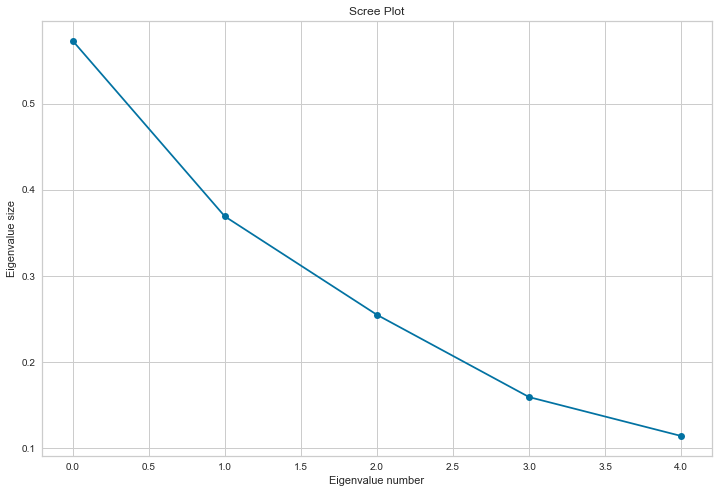

In [79]:
plt.rcParams['figure.figsize'] = (12,8)
plt.plot(pca.explained_variance_, marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")

# Extracting Segments

C:\Users\91951\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\91951\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\91951\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\91951\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

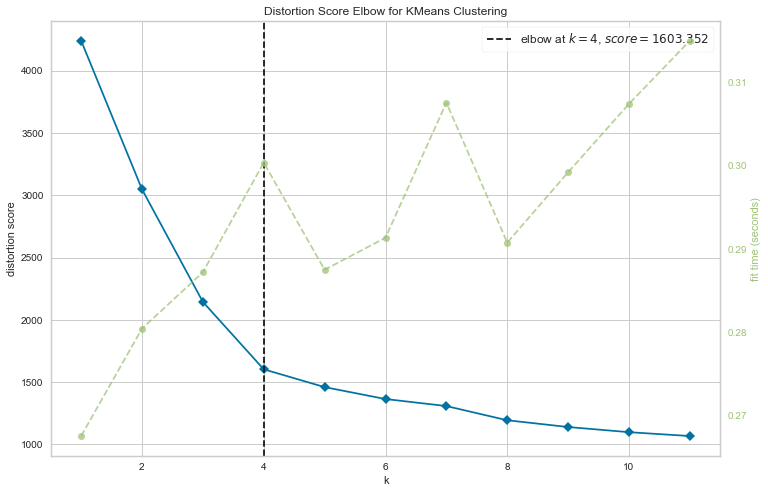

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [97]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(data_mod_forPCA)
visualizer.show()

Conclusion: Best Number of Clusters = 4

# Using K-Means Clustering (Number of Clusters = 4)

In [81]:
import os
os.environ["OMP_NUM_THREADS"] ='6'

In [95]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(pf)
pf['cluster_num'] = kmeans.labels_ 
data_mod_forPCA["cluster_num"] = kmeans.labels_ 

C:\Users\91951\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [96]:
print("K-Means Labels:")
print(kmeans.labels_,end="  \n\n")
print("Within Cluster SS:")
print(kmeans.inertia_,end="  \n\n")
print("Number of Iterations Taken:")
print(kmeans.n_iter_,end="  \n\n")

K-Means Labels:
[3 2 2 ... 2 1 0]

Within Cluster SS:
960.1782311301811

Number of Iterations Taken:
3



### Cluster Sizes

In [84]:
Counter(kmeans.labels_)

Counter({1: 308, 0: 354, 3: 550, 2: 241})

### Visualizing Clusters

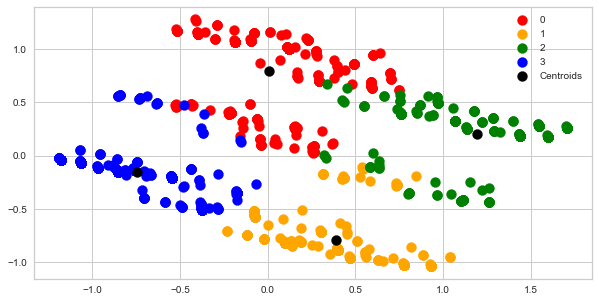

In [85]:
plt.figure(figsize=(10,5))
plt.scatter(pf.values[y_kmeans  == 0, 0], pf.values[y_kmeans  == 0, 1], s = 100, c = 'red', label = '0')
plt.scatter(pf.values[y_kmeans  == 1, 0], pf.values[y_kmeans  == 1, 1], s = 100, c = 'orange', label = '1')
plt.scatter(pf.values[y_kmeans  == 2, 0], pf.values[y_kmeans  == 2, 1], s = 100, c = 'green', label = '2')
plt.scatter(pf.values[y_kmeans  == 3, 0], pf.values[y_kmeans  == 3, 1], s = 100, c = 'blue', label = '3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.legend()

# Selecting Target Segment

In [86]:
data_mod['cluster_num'] = pf['cluster_num']

Visit Frequency

In [87]:
data_mod['VisitFrequency'] = LabelEncoder().fit_transform(data_mod['VisitFrequency'])
visit = data_mod.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.533898
1,1,2.818182
2,2,2.668050
3,3,2.590909


Like

In [88]:
data_mod['Like'] = LabelEncoder().fit_transform(data_mod['Like'])
Like = data_mod.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,7.132768
1,1,3.503247
2,2,2.331950
3,3,7.687273


Gender

In [89]:
data_mod['Gender'] = LabelEncoder().fit_transform(data_mod['Gender'])
Gender = data_mod.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.514124
1,1,0.405844
2,2,0.580913
3,3,0.396364


In [90]:
segment = Gender.merge(Like, on='cluster_num').merge(visit, on='cluster_num')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.514124,7.132768,2.533898
1,1,0.405844,3.503247,2.818182
2,2,0.580913,2.331950,2.668050
3,3,0.396364,7.687273,2.590909


In [91]:
# Visit Frequency is highest for Segment 3 but their liking is low #

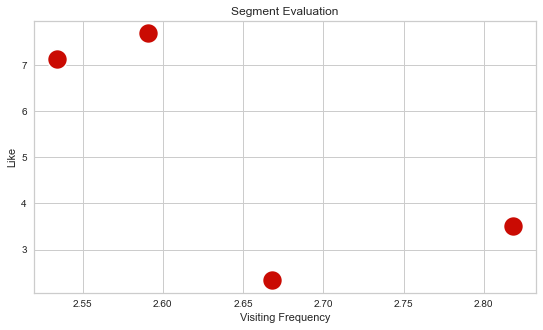

In [92]:
plt.figure(figsize = (9,5))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Segment Evaluation") 
plt.xlabel("Visiting Frequency") 
plt.ylabel("Like") 
plt.show()

Conclusion :
Market Segment 3 views McDonald's in a negative way. People of market segment 3, however, could be a potential target in terms of the frequency of visits. Marketing efforts should be targeted to counteract this segment's unfavourable impressions and hence less liking of the food. As a consequence of this, McDonald's could be able to increase the number of its customers.